In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

from collections import defaultdict

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import SequentialFeatureSelector

from mlxtend.feature_selection import SequentialFeatureSelector as SFS


from statsmodels.stats.outliers_influence import variance_inflation_factor 


from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from sklearn.metrics import make_scorer

#from custom_scorer_module import custom_scoring_function

from sklearn.model_selection import ShuffleSplit,cross_val_score
from stepwise_regression import step_reg
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

import warnings
warnings.filterwarnings("ignore")

In [32]:
df_train = pd.read_csv('7406train.csv', header=None)
col_dict=defaultdict()
for item in df_train.columns:
    col_dict[item]='col_'+ str(item)

In [33]:
#df_train.iloc[0:1,:]

In [34]:
df_train.rename(columns=col_dict, inplace=True)
df_train.rename(columns={'col_0':'x1','col_1':'x2'}, inplace=True)
df_train_1=df_train[['x1','x2']]
df_train_1['mean_cols']=np.mean(df_train.iloc[:,2:202], axis=1)
df_train_1['var_cols']=np.var(df_train.iloc[:,2:202], axis=1)
final_df_mean=df_train_1[['x1','x2','mean_cols']]
final_df_var=df_train_1[['x1','x2','var_cols']]
final_df_var

,x1,x2,var_cols
0,0.00,0.00,129.393247
1,0.00,0.01,81.048565
2,0.00,0.02,78.213141
3,0.00,0.03,131.763423
4,0.00,0.04,92.790727
...,...,...,...
9995,0.99,0.95,114.388978
9996,0.99,0.96,99.231415
9997,0.99,0.97,82.897736
9998,0.99,0.98,51.309250


In [35]:
X=final_df_mean[['x1','x2']]
y=final_df_mean['mean_cols']

In [36]:
from generalized_additive_models import GAM, Spline, Categorical

In [37]:
terms = Spline("x1") + Spline("x2") 
gam = GAM(terms)

In [38]:
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_gam=cross_val_score(gam,X,y,cv=shuffle_split, scoring="r2")
print("cross Validation scores:n {}".format(scores_gam))
print("Average Cross Validation score :{}".format(scores_gam.mean()))
print("Variance of Cross Validation score :{}".format(scores_gam.var()))

cross Validation scores:n [0.98386963 0.98216753 0.98250685 0.98169179 0.98268923 0.98320078
 0.98268594 0.9832097  0.9835374  0.98337097 0.98344003 0.98336604
 0.98268939 0.98302487 0.98326188 0.98397993 0.98232644 0.98323396
 0.98307341 0.98275163 0.98305703 0.98280382 0.98258496 0.98212019
 0.98254745 0.98269819 0.98204055 0.98202532 0.98328819 0.98280756
 0.98330728 0.98176642 0.98293741 0.98251544 0.98229741 0.98203072
 0.98260312 0.98392008 0.9831434  0.98332477 0.98299838 0.98296349
 0.98335773 0.98204867 0.98267057 0.98329548 0.98285559 0.98233471
 0.98220848 0.98219847 0.98332456 0.98228688 0.98236797 0.98312754
 0.98335322 0.9829729  0.98255145 0.98318724 0.98257143 0.98307012
 0.98187957 0.98384727 0.98369179 0.9826868  0.98240232 0.9827361
 0.9819496  0.98265393 0.98319583 0.98300674 0.98333859 0.98262939
 0.98292074 0.98275289 0.98251728 0.9826071  0.98280184 0.98319383
 0.98217809 0.98295881 0.98273817 0.98266123 0.98217752 0.98310162
 0.98279577 0.9829953  0.98367503 0.9

In [240]:
model = gam
model.fit(X,y)
final_df_mean['y__mean_new_gam']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_mean['y__mean_new_gam'],final_df_mean['mean_cols']))

3.174848838417639


In [242]:
gbm_model = GradientBoostingRegressor(random_state=77)

In [244]:
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
gbm_params = {"learning_rate": [0.001, 0.01,.1,1], 
              "max_depth": [3,5,8], 
              "n_estimators": [100,200,250,500], 
              "subsample": [1,0.5,0.8], 
              "loss": ["squared_error", "absolute_error","huber", "quantile"],
             'ccp_alpha':np.linspace(.001, .1,50)}

gbm_cv_model = RandomizedSearchCV(gbm_model, gbm_params, 
                            cv=10, verbose=1, n_iter = 50).fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [245]:
#gbm_cv_model.fit(X, y)
gbm_cv_model.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'max_depth': 8,
 'loss': 'huber',
 'learning_rate': 0.1,
 'ccp_alpha': 0.001}

In [39]:
model_gbr = GradientBoostingRegressor(subsample= 0.5,
 n_estimators= 100,
 max_depth= 8,
 loss= 'huber',
 learning_rate= 0.1,
 ccp_alpha= 0.001,
                             random_state=77)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_gbr=cross_val_score(model_gbr,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_gbr))
print("Average Cross Validation score :{}".format(scores_gbr.mean()))
print("Variance of Cross Validation score :{}".format(scores_gbr.var()))

cross Validation scores:n [0.99309222 0.99271785 0.99291247 0.9929461  0.99306145 0.99300109
 0.99306969 0.9928601  0.99307724 0.99276466 0.9928756  0.99316181
 0.99292389 0.99281577 0.99291137 0.99304869 0.99270934 0.99301341
 0.99323827 0.99275374 0.99305117 0.9930896  0.99276501 0.99294371
 0.99285614 0.99277997 0.99279069 0.9925241  0.99290724 0.99280288
 0.99273117 0.99271038 0.99291671 0.99327275 0.99294167 0.99292245
 0.99284308 0.99312547 0.99320066 0.993089   0.99289038 0.99289343
 0.99310424 0.99241566 0.99279341 0.99300134 0.9928216  0.99262653
 0.99243503 0.99300006 0.99290534 0.99300219 0.99294067 0.99290196
 0.99269278 0.99303695 0.9928769  0.99274525 0.99322609 0.99340309
 0.99264323 0.99284205 0.99309416 0.99311941 0.99248789 0.99310735
 0.99263072 0.99287605 0.9929358  0.99318912 0.99322116 0.99287296
 0.99291676 0.99265643 0.99282321 0.9929124  0.99325815 0.99287277
 0.99332353 0.99302468 0.99275576 0.99321758 0.9930935  0.99275265
 0.99354285 0.99287874 0.99296197 0.

In [40]:
model = model_gbr
model.fit(X,y)
final_df_mean['y__mean_new_gbr']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_mean['y__mean_new_gbr'],final_df_mean['mean_cols']))

1.0549762009644308


In [42]:
import xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=77)

In [151]:
xgb_params = {"learning_rate": np.linspace(.001, .1,50),
"max_depth": [2,3,4,5,8],
"n_estimators": [100,200,500,1000, 250],
"colsample_bytree": [0.4,0.7,1]}

In [249]:
xgb_cv_model = RandomizedSearchCV(xgb_model, xgb_params, 
                            cv=10, verbose=1, n_iter = 50).fit(X, y)
xgb_cv_model.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'n_estimators': 250,
 'max_depth': 4,
 'learning_rate': 0.0656530612244898,
 'colsample_bytree': 1}

In [43]:
model_xgb = XGBRegressor(
 n_estimators= 250,
 max_depth= 4,
colsample_bytree=1,
 learning_rate= 0.0656530612244898,

                             random_state=77)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_xgb=cross_val_score(model_xgb,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_xgb))
print("Average Cross Validation score :{}".format(scores_xgb.mean()))
print("Variance of Cross Validation score :{}".format(scores_xgb.var()))

cross Validation scores:n [0.99340549 0.99280957 0.99303495 0.9931237  0.9932603  0.99330367
 0.99332792 0.99313025 0.99322517 0.99312996 0.99306035 0.99335359
 0.99320746 0.99310743 0.99314526 0.99335774 0.99295293 0.99320981
 0.99341928 0.99299915 0.9931847  0.99323404 0.99295554 0.99316724
 0.99309782 0.99302608 0.9931586  0.99275197 0.99309369 0.99282844
 0.99298521 0.99291307 0.99301521 0.99348919 0.99322104 0.99310213
 0.99304492 0.99332767 0.99338126 0.99337259 0.99315102 0.99317796
 0.99329546 0.99271208 0.99307231 0.99324001 0.99308279 0.99281494
 0.99287762 0.99311493 0.99329247 0.9931846  0.9931804  0.99298536
 0.99291418 0.9933136  0.99311759 0.99300422 0.99345674 0.99369827
 0.992925   0.99311087 0.99330922 0.99335949 0.99272952 0.99327725
 0.99300277 0.99311358 0.99312201 0.99346895 0.99333002 0.99311619
 0.99312005 0.99302565 0.99293391 0.99305388 0.99345408 0.99314279
 0.99349319 0.99329564 0.99310186 0.99346322 0.99332861 0.99302003
 0.99365226 0.99314351 0.99318652 0.

In [44]:
model = model_xgb
model.fit(X,y)
final_df_mean['y__mean_new_xgb']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_mean['y__mean_new_xgb'],final_df_mean['mean_cols']))

1.097609703075469


In [161]:
from sklearn.svm import SVR

model = RandomForestRegressor(n_estimators= 100,
 min_samples_split= 20,
 max_depth= 50,
 criterion= 'squared_error',
 ccp_alpha= 0.0030204081632653063,
                             random_state=77)

model.fit(X,y)
final_df_mean['y__mean_new']=model.predict(X)
print(np.sum((final_df_mean['y__mean_new']-final_df_mean['mean_cols'])**2)/10000)
print(np.sqrt(mean_squared_error(final_df_mean['mean_cols'],final_df_mean['y__mean_new'])))

1.1056880807394094
1.051517037778946


In [46]:
from sklearn.neighbors import KNeighborsRegressor


In [252]:

knn_params = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = RandomizedSearchCV(knn, knn_params, cv=10, random_state=123,verbose=1, n_iter = 50).fit(X, y)
knn_cv_model.best_params_

Fitting 10 folds for each of 29 candidates, totalling 290 fits


{'n_neighbors': 10}

In [47]:
model_knn = KNeighborsRegressor(n_neighbors=10)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_knn=cross_val_score(model_knn,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_knn))
print("Average Cross Validation score :{}".format(scores_knn.mean()))
print("Variance of Cross Validation score :{}".format(scores_knn.var()))

cross Validation scores:n [0.99295252 0.99256164 0.99272351 0.9928647  0.99291763 0.99291529
 0.99290602 0.9928108  0.99286632 0.99274062 0.99284371 0.99290494
 0.99281941 0.99278156 0.99275946 0.99296316 0.99249695 0.99286681
 0.99303465 0.99248792 0.99281907 0.99302575 0.99260606 0.99274243
 0.99264735 0.99274989 0.9927599  0.99231676 0.99275972 0.9925708
 0.99256957 0.99256959 0.99269701 0.99318802 0.99291921 0.99286154
 0.99263687 0.99302349 0.99315088 0.99310643 0.99282153 0.99273544
 0.99290029 0.99221975 0.99265283 0.99307027 0.99263293 0.99240796
 0.99239572 0.99292496 0.99295713 0.99288256 0.99278887 0.99262023
 0.99257447 0.99284158 0.99270661 0.99269101 0.9930906  0.99326552
 0.99254587 0.99276761 0.99304216 0.99296538 0.99239513 0.992997
 0.99258495 0.99269151 0.99288722 0.9930393  0.99309971 0.99276513
 0.99281077 0.99268858 0.99279223 0.99267041 0.99323886 0.99275576
 0.99319556 0.99287667 0.99276212 0.99294583 0.99311049 0.99257641
 0.99334113 0.99269499 0.99288246 0.992

In [48]:
model = model_knn
model.fit(X,y)
final_df_mean['y__mean_new_knn']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_mean['y__mean_new_knn'],final_df_mean['mean_cols']))

1.0849007546106773


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [257]:

dt_grid = {
                 'n_estimators' : [10,100,200,250,300,400,500],
                 'criterion': ['squared_error','absolute_error','poisson','friedman_mse'],
                 'max_depth': [10,50,75,100,120,150,200, None],
                 'min_samples_split': [5,10,20,50,2,100],
                
                 
                'ccp_alpha':np.linspace(.001, .1,50)
                 
                 }

rf = RandomForestRegressor(random_state=77)
r_rf = RandomizedSearchCV(param_distributions=dt_grid, 
                                    estimator = rf, scoring = "r2", 
                                    verbose = 1, n_iter = 50, cv = 10, random_state=77)

In [258]:
r_rf.fit(X, y)
r_rf.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'n_estimators': 100,
 'min_samples_split': 20,
 'max_depth': 50,
 'criterion': 'squared_error',
 'ccp_alpha': 0.0030204081632653063}

In [51]:
model_rf = RandomForestRegressor(n_estimators= 100,
 min_samples_split= 20,
 max_depth= 50,
 criterion= 'squared_error',
 ccp_alpha= 0.0030204081632653063,
                             random_state=77)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_rf=cross_val_score(model_rf,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_rf))
print("Average Cross Validation score :{}".format(scores_rf.mean()))
print("Variance of Cross Validation score :{}".format(scores_rf.var()))

cross Validation scores:n [0.99295343 0.99249944 0.99259185 0.99281424 0.99267222 0.99273708
 0.99284665 0.99257952 0.99275959 0.99264532 0.99264761 0.99292085
 0.99290057 0.99261745 0.99272472 0.99291121 0.99246874 0.99271842
 0.99303545 0.99253433 0.9927259  0.99287712 0.99251653 0.99258368
 0.99259899 0.99257491 0.99261043 0.99226708 0.9925717  0.99257748
 0.99255601 0.99246375 0.99263334 0.99308918 0.99271696 0.99265403
 0.99260226 0.99291728 0.99308631 0.99301075 0.99270779 0.99260102
 0.99275405 0.99228104 0.99253056 0.99276013 0.99250271 0.99235412
 0.99230776 0.99274475 0.99286899 0.99271755 0.99271498 0.99269589
 0.99244259 0.99275307 0.99256332 0.99263701 0.99285539 0.99309815
 0.99238722 0.99260243 0.99294705 0.99289959 0.99227425 0.99278827
 0.99253729 0.99266549 0.99262701 0.99305419 0.99297461 0.99280054
 0.99273226 0.99252363 0.99259461 0.99272537 0.99317727 0.99261341
 0.99306172 0.99296893 0.99258881 0.99297136 0.99300026 0.99251304
 0.99330726 0.99265528 0.99269546 0.

In [52]:
model = model_rf
model.fit(X,y)
final_df_mean['y__mean_new_rf']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_mean['y__mean_new_rf'],final_df_mean['mean_cols']))

1.1056880807394094


In [55]:
from sklearn.svm import SVR

In [263]:

dt_grid = {
                 'kernel' : ['linear','poly','rbf','sigmoid'],
                 'degree': [2,3,4,5],
                 'gamma': ['scale','auto',.001,.01,.1,1,.02,.05],
                 'C': [5,10,15,20,25,50,100,150],
    'epsilon':np.linspace(.001, .1,50)
    
                 
                 }

svr = SVR()
r_svr = RandomizedSearchCV(param_distributions=dt_grid, 
                                    estimator = svr, scoring = "r2", 
                                    verbose = 1, n_iter = 25, cv = 10, random_state=77)

In [264]:
r_svr.fit(X, y)
r_svr.best_params_

Fitting 10 folds for each of 25 candidates, totalling 250 fits


{'kernel': 'rbf',
 'gamma': 1,
 'epsilon': 0.015142857142857145,
 'degree': 4,
 'C': 5}

In [56]:
model_svr = SVR(kernel= 'rbf',
 gamma= 1,
 degree= 4,
 C= 5,
           epsilon= 0.015142857142857145)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_svr=cross_val_score(model_svr,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_svr))
print("Average Cross Validation score :{}".format(scores_svr.mean()))
print("Variance of Cross Validation score :{}".format(scores_svr.var()))

cross Validation scores:n [0.99242802 0.99228009 0.99206814 0.9924481  0.99238507 0.9924475
 0.99233831 0.99253714 0.99228463 0.99233816 0.99214528 0.99259474
 0.99221799 0.99229031 0.99229451 0.99257296 0.99215621 0.99232665
 0.99259984 0.99237407 0.99226287 0.99255985 0.99225665 0.99228499
 0.99228681 0.99213379 0.99233586 0.99193447 0.99231462 0.99212728
 0.99219531 0.99222227 0.99227512 0.99260735 0.99240704 0.99233883
 0.99209173 0.99260606 0.99261883 0.99258589 0.99234144 0.99233808
 0.99224081 0.99185127 0.99231982 0.9926357  0.99207908 0.99215222
 0.99208623 0.99255614 0.99256287 0.99235171 0.99225639 0.99228097
 0.99210695 0.99235884 0.9922515  0.99217387 0.99253305 0.99276375
 0.99217849 0.99224989 0.99262023 0.99241424 0.99211428 0.9924998
 0.99215253 0.99228197 0.99232157 0.99271285 0.99249591 0.9923253
 0.99242371 0.99222102 0.99207294 0.9923713  0.99255371 0.9924514
 0.99257249 0.99251556 0.9921619  0.99232881 0.99253561 0.99220741
 0.99270287 0.99231847 0.99238121 0.9920

In [57]:
model = model_svr
model.fit(X,y)
final_df_mean['y__mean_new_svr']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_mean['y__mean_new_svr'],final_df_mean['mean_cols']))

1.3832014892525748


In [60]:
from sklearn.ensemble import AdaBoostRegressor

In [275]:

adab_model=AdaBoostRegressor(random_state=77)

adab_params = {"learning_rate": np.linspace(0,10,1000),
"loss": ['linear','square','exponential'],
"n_estimators": [100,200,500,1000, 250]
}


adab_cv_model = RandomizedSearchCV(adab_model, adab_params, 
                            cv=10, verbose=1, n_iter = 50, random_state=77).fit(X, y)
adab_cv_model.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'n_estimators': 500, 'loss': 'linear', 'learning_rate': 3.4934934934934936}

In [61]:
model_ada = AdaBoostRegressor(random_state=77,n_estimators=500,loss='linear',learning_rate=3.4934934934934936)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_adab=cross_val_score(model_ada,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_adab))
print("Average Cross Validation score :{}".format(scores_adab.mean()))
print("Variance of Cross Validation score :{}".format(scores_adab.var()))

cross Validation scores:n [0.98843364 0.98847424 0.98852095 0.98830744 0.98916828 0.98899209
 0.9877799  0.98859067 0.98876562 0.9885262  0.98779017 0.98838841
 0.98864143 0.98890446 0.98842632 0.98886979 0.98780734 0.98813524
 0.98778225 0.9882019  0.98837933 0.98876986 0.98807982 0.98747175
 0.98770999 0.98806952 0.98829161 0.9877381  0.9880376  0.98768816
 0.98800994 0.98817951 0.98857422 0.98864618 0.9887918  0.98840265
 0.98889868 0.98927404 0.98883966 0.98863605 0.9886284  0.98836018
 0.98875184 0.98809035 0.98811011 0.98825584 0.98800563 0.98881079
 0.98750589 0.98828763 0.98906081 0.98866792 0.98834883 0.98879572
 0.98777788 0.98823096 0.98817053 0.98748089 0.98863259 0.98905488
 0.98818991 0.98813592 0.9894678  0.98808468 0.98792466 0.98828313
 0.98766997 0.98824237 0.98816554 0.98873677 0.98858269 0.98874233
 0.98926505 0.98789776 0.98896582 0.98767062 0.98846525 0.98795753
 0.98855656 0.9888838  0.98797638 0.98840383 0.98879944 0.9878723
 0.98901998 0.98894654 0.98854679 0.9

In [62]:
model = model_ada
model.fit(X,y)
final_df_mean['y__mean_new_ada']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_mean['y__mean_new_ada'],final_df_mean['mean_cols']))

2.0539368580185524


In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [278]:




train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later


    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

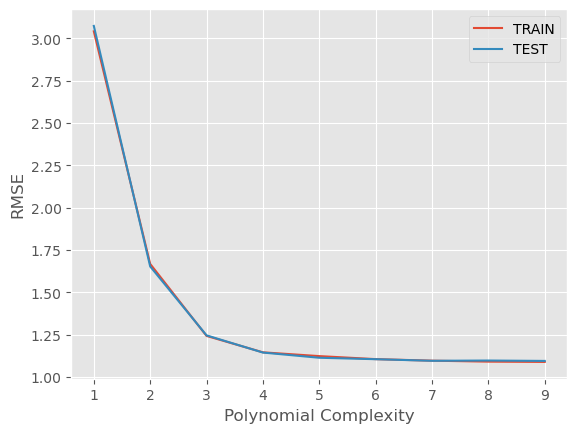

In [279]:
plt.plot(range(1,10),train_rmse_errors[:11],label='TRAIN')
plt.plot(range(1,10),test_rmse_errors[:11],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [65]:
polynomial_converter = PolynomialFeatures(degree=4,include_bias=False)

model_pc = LinearRegression(fit_intercept=True)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_pc=cross_val_score(model_pc,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_pc))
print("Average Cross Validation score :{}".format(scores_pc.mean()))
print("Variance of Cross Validation score :{}".format(scores_pc.var()))

cross Validation scores:n [0.95160318 0.94982481 0.95158989 0.94876944 0.94998146 0.94947945
 0.95153754 0.95076021 0.94947163 0.95162626 0.94977665 0.94917192
 0.95244959 0.95036873 0.94991666 0.95125119 0.95126797 0.94987703
 0.950762   0.94914983 0.95032381 0.95123839 0.94969317 0.95121402
 0.95015141 0.94875246 0.94862108 0.9491129  0.94781049 0.95057374
 0.94964168 0.94956744 0.95109611 0.95173659 0.94964013 0.94920172
 0.94864009 0.95094739 0.95109409 0.95048274 0.9491785  0.94979448
 0.95053493 0.94906661 0.95168508 0.95070469 0.9495516  0.94953242
 0.95109165 0.95128763 0.95119993 0.94996158 0.95094248 0.95042505
 0.95061546 0.95108135 0.94983169 0.95057499 0.95039295 0.95144461
 0.95029924 0.95150905 0.9523005  0.95109408 0.94977669 0.95028924
 0.94893288 0.94953926 0.9511886  0.95020432 0.95034103 0.94917727
 0.94921856 0.94963163 0.94933191 0.95119862 0.95115918 0.94980858
 0.9507728  0.9495924  0.95075073 0.9509309  0.94969029 0.94865888
 0.95142028 0.9496609  0.94997621 0.

In [66]:
model = model_pc
model.fit(X,y)
final_df_mean['y__mean_new_pc']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_mean['y__mean_new_pc'],final_df_mean['mean_cols']))

9.301019938134218


In [287]:
final_df_mean['new_mean']=np.mean(final_df_mean.loc[:,['y__mean_new_gbr','y__mean_new_xgb','y__mean_new_knn','y__mean_new_rf']],axis=1)
print(mean_squared_error(final_df_mean['new_mean'],final_df_mean['mean_cols']))

1.0451210038506402


In [95]:
#!pip install pyearth

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


In [18]:
nInput  = 2
nHidden = 10
nOutput = 1

In [19]:
class MLPcondensed(nn.Module):
    '''
    Multi-layer perceptron for non-linear regression.
    '''
    def __init__(self, nInput, nHidden, nOutput):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(nInput, nHidden),
            nn.ReLU(),
            nn.Linear(nHidden, nHidden),
            nn.ReLU(),
            nn.Linear(nHidden, nHidden),
            nn.ReLU(),
            nn.Linear(nHidden, nOutput)
        )

    def forward(self, x):
        return(self.layers(x))

mlpCondensed = MLPcondensed(nInput, nHidden, nOutput)

In [20]:
class MLPexplicit(nn.Module):
    '''
    Multi-layer perceptron for non-linear regression.
    '''
    def __init__(self, nInput, nHidden, nOutput):
        super(MLPexplicit, self).__init__()
        self.nInput  = nInput
        self.nHidden = nHidden
        self.nOutput = nOutput
        self.linear1 = nn.Linear(self.nInput, self.nHidden)
        self.linear2 = nn.Linear(self.nHidden, self.nHidden)
        self.linear3 = nn.Linear(self.nHidden, self.nHidden)
        self.linear4 = nn.Linear(self.nHidden, self.nOutput)
        self.ReLU    = nn.ReLU()

    def forward(self, x):
        h1 = self.ReLU(self.linear1(x))
        h2 = self.ReLU(self.linear2(h1))
        h3 = self.ReLU(self.linear3(h2))
        output = self.linear4(h3)
        return(output)

mlpExplicit = MLPexplicit(nInput, nHidden, nOutput)

In [67]:
model_nn = mlpExplicit

X_tensor = torch.tensor(X.values.astype(float))
X_tensor=X_tensor.to(torch.float32)
y_tensor = torch.tensor(y.values.astype(float))
y_tensor=y_tensor.to(torch.float32)

In [22]:
class nonLinearRegressionData(Dataset):
    '''
    Custom 'Dataset' object for our regression data.
    Must implement these functions: __init__, __len__, and __getitem__.
    '''

    def __init__(self, X_tensor, y_tensor):
        self.X_tensor = torch.reshape(X_tensor, (len(X_tensor), 2))
        self.y_tensor = torch.reshape(y_tensor, (len(y_tensor), 1))

    def __len__(self):
        return(len(self.X_tensor))

    def __getitem__(self, idx):
        return(X_tensor[idx], y_tensor[idx])

# instantiate Dataset object for current training data
d = nonLinearRegressionData(X_tensor, y_tensor)

In [23]:
train_dataloader = DataLoader(d, batch_size=25 , shuffle=True)
train_dataloader

In [24]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model_nn.parameters(), lr=1e-4)
nTrainSteps = 50000

# Run the training loop
for epoch in range(0, nTrainSteps):

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(train_dataloader, 0):
        
        #print(len(data[0]))
        #print(len(data[1]))
        # Get inputs
        inputs, targets = data
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass (make sure to supply the input in the right way)
        outputs = model_nn(torch.reshape(inputs, (len(inputs), 2))).squeeze()
        # Compute loss
        loss = loss_function(outputs, targets)
        # Perform backward pass
        loss.backward()
        # Perform optimization
        optimizer.step()
        # Print statistics
        current_loss += loss.item()

    if (epoch + 1) % 2500 == 0:
        print("Loss after epoch %5d: %.3f" % (epoch + 1, current_loss))
        current_loss = 0.0

# Process is complete.
print("Training process has finished.")




Loss after epoch  2500: 3725.720
Loss after epoch  5000: 3724.681
Loss after epoch  7500: 3725.576
Loss after epoch 10000: 3725.528
Loss after epoch 12500: 3724.672
Loss after epoch 15000: 3723.767
Loss after epoch 17500: 3724.213
Loss after epoch 20000: 3725.011
Loss after epoch 22500: 3723.720
Loss after epoch 25000: 3725.716
Loss after epoch 27500: 3723.898
Loss after epoch 30000: 3723.098
Loss after epoch 32500: 3723.871
Loss after epoch 35000: 605.361
Loss after epoch 37500: 605.014
Loss after epoch 40000: 604.348
Loss after epoch 42500: 604.314
Loss after epoch 45000: 604.295
Loss after epoch 47500: 603.108
Loss after epoch 50000: 603.839
Training process has finished.


In [68]:
model=model_nn
yPred = np.array(
    [model.forward(o).detach().numpy() for o in X_tensor]
).flatten()

In [69]:
mean_squared_error(y,yPred)

1.5041735394571727

In [70]:
from sklearn.metrics import r2_score
r2_score(y, yPred)

0.9919481143843457

In [ ]:
# GAM - Mean --> 3.17 / 3.17
# GBR - Mean --> 1.22 / 1.05
# XGB - Mean --> 1.16 / 1.09
# KNN - Mean --> 1.06 / 1.08
# NN - Mean --> 1.34
# SVR - Mean --> 1.21 / 1.383
# Random Forest - Mean --> 1.105 / 1.105
# AdaBoost - Mean --> 3.83 / 2.05
# PC : 9.3

In [289]:
final_df_mean

,x1,x2,mean_cols,y__mean_new_gam,y__mean_new_gbr,y__mean_new_xgb,y__mean_new_knn,y__mean_new_rf,y__mean_new_svr,y__mean_new_ada,y__mean_new_pc,new_mean
0,0.00,0.00,21.368195,22.423040,20.509573,20.757019,20.718305,20.431409,20.692461,21.240605,29.132294,20.604077
1,0.00,0.01,19.006440,22.324004,20.475261,20.317507,20.831623,20.431409,20.623087,21.240605,28.998949,20.513950
2,0.00,0.02,20.258861,22.240327,20.475261,20.358309,20.487263,20.431409,20.557030,21.240605,28.865603,20.438060
3,0.00,0.03,21.553905,22.168940,20.475261,20.471489,20.527792,20.431409,20.494232,21.240605,28.732257,20.476488
4,0.00,0.04,20.659588,22.106770,20.475261,20.490627,20.749408,20.431409,20.434623,21.240605,28.598912,20.536676
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.99,0.95,60.938533,55.081039,60.804880,61.143772,60.856213,60.370910,60.782699,60.721671,60.209809,60.793944
9996,0.99,0.96,61.575708,54.920480,61.220674,61.714535,61.043435,60.655955,60.811204,60.815271,60.076463,61.158650
9997,0.99,0.97,61.362636,54.771718,61.342073,61.828854,61.433170,60.715020,60.841028,60.853211,59.943117,61.329779
9998,0.99,0.98,62.292096,54.633705,61.663028,62.229706,61.720889,60.715020,60.872047,60.853211,59.809772,61.582160
